<a href="https://colab.research.google.com/github/saahilgupta93/awesome-collection-of-google-colab-notebooks/blob/master/fastai_train_superhero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from pathlib import Path
from fastai import *
from fastai.vision import *
import torch

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
path = Path('/content/gdrive/My Drive/CAX_Superhero_Train/'); path.ls()

[PosixPath('/content/gdrive/My Drive/CAX_Superhero_Train/train'),
 PosixPath('/content/gdrive/My Drive/CAX_Superhero_Train/valid'),
 PosixPath('/content/gdrive/My Drive/CAX_Superhero_Train/models')]

In [0]:
#tfms = get_transforms(do_flip=True, flip_vert=True, max_rotate=10.0, max_zoom=1.1, max_lighting=0.2, max_warp=0.2, p_affine=0.75, p_lighting=0.75)
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path,ds_tfms=tfms, size=224)

In [0]:
data.classes

['Ant-Man',
 'Aquaman',
 'Avengers',
 'Batman',
 'Black Panther',
 'Captain America',
 'Catwoman',
 'Ghost Rider',
 'Hulk',
 'Iron Man',
 'Spiderman',
 'Superman']

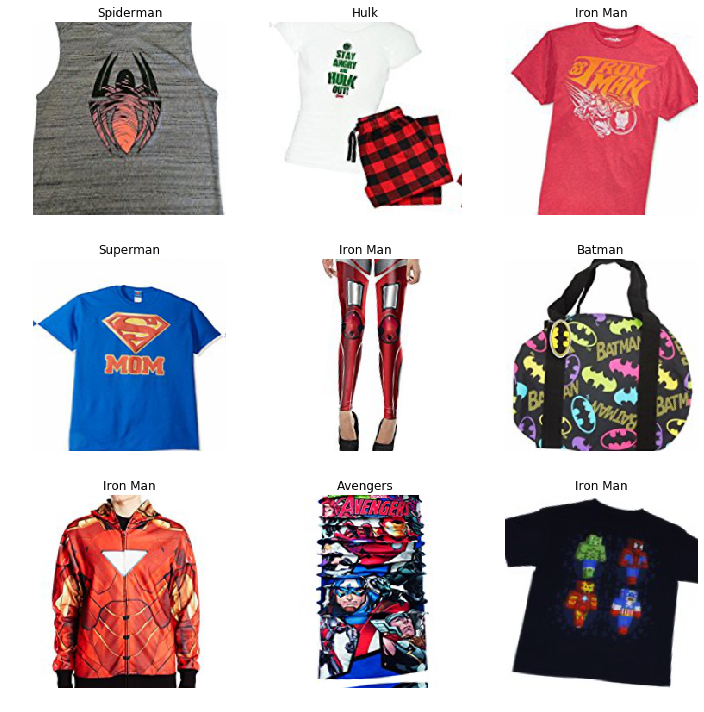

In [0]:
data.show_batch(rows=3, figsize=(10,10))

In [0]:
my_trained_mod = create_cnn(data, models.resnet34, metrics=error_rate)
my_trained_mod.fit_one_cycle(6)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 83540612.11it/s]


epoch,train_loss,valid_loss,error_rate,time
0,2.112964,1.292034,0.383333,20:37
1,1.396537,0.973767,0.308333,00:51
2,1.057261,0.893621,0.283333,00:49
3,0.885756,0.849029,0.275000,00:50
4,0.763909,0.758404,0.216667,00:51
5,0.708553,0.771675,0.233333,00:51


In [0]:
my_trained_mod.save('/content/gdrive/My Drive/grocery_retail_dl/classification/Kvest-stage-1_ss')

In [0]:
# This gathers the data together for the comparing top losses and confusion Matrix
interp = ClassificationInterpretation.from_learner(my_trained_mod)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

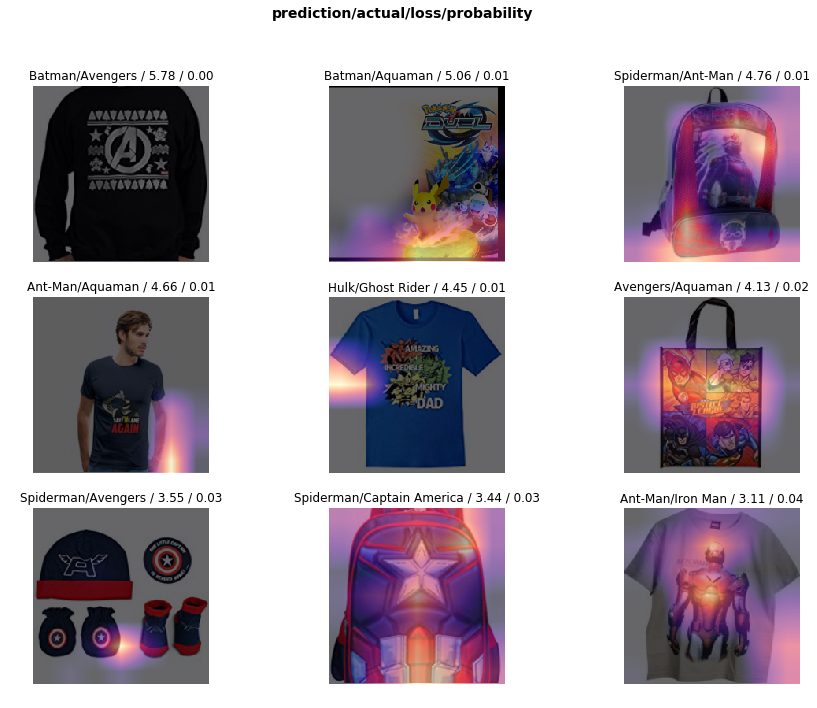

In [0]:
#Lists the top categories
interp.plot_top_losses(9, figsize=(15,11))

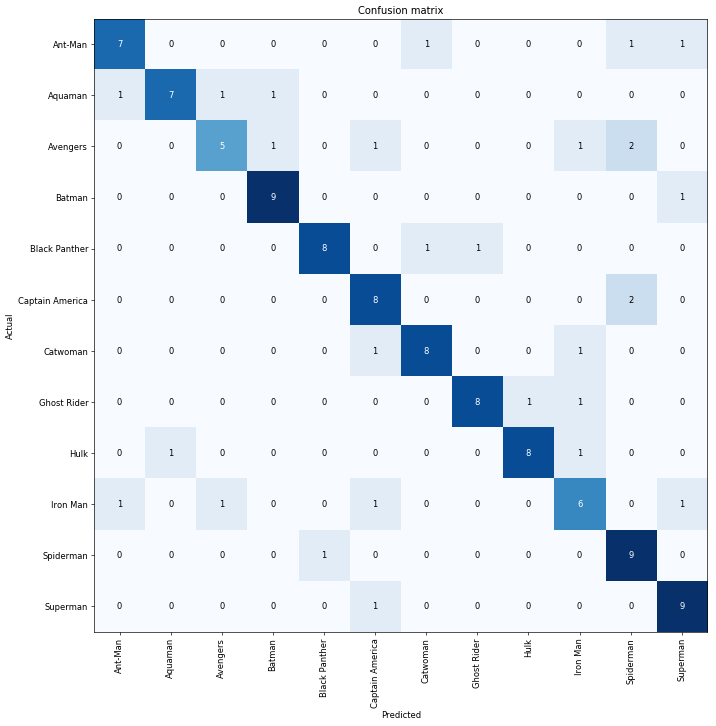

In [0]:

#shows where things went wrong in a confusion matrix
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [0]:
#most confused
interp.most_confused(min_val=2)

[('Avengers', 'Spiderman', 2), ('Captain America', 'Spiderman', 2)]

In [0]:
# We are going to fine tune the model.
# First we want to load the previous weights
my_trained_mod.load('/content/gdrive/My Drive/grocery_retail_dl/classification/Kvest-stage-1_ss');
# We are going to find the optimal learning rate curve
my_trained_mod.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


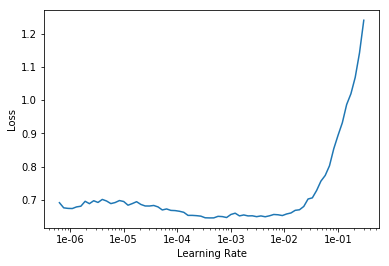

In [0]:
#shows the curve; we choose a point that is solidly low
my_trained_mod.recorder.plot()

In [0]:

#we are going to unfreeze the model allowing the pretrained weights to move around a bit.
my_trained_mod.unfreeze()
#we break this up. Lower layers change weights more slowly than higher layers. Run twice
my_trained_mod.fit_one_cycle(2, max_lr=slice(1e-6,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.686121,0.733472,0.216667,00:53
1,0.538850,0.706659,0.225000,00:52


In [0]:
my_trained_mod.fit_one_cycle(2, max_lr=slice(1e-6,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.460520,0.648379,0.208333,00:51
1,0.382603,0.632301,0.200000,00:54


In [0]:
my_trained_mod.save('/content/gdrive/My Drive/grocery_retail_dl/classification/Kvest-stage-2_ss')

In [0]:
# This gathers the data together for the comparing top losses and confusion Matrix
interp = ClassificationInterpretation.from_learner(my_trained_mod)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

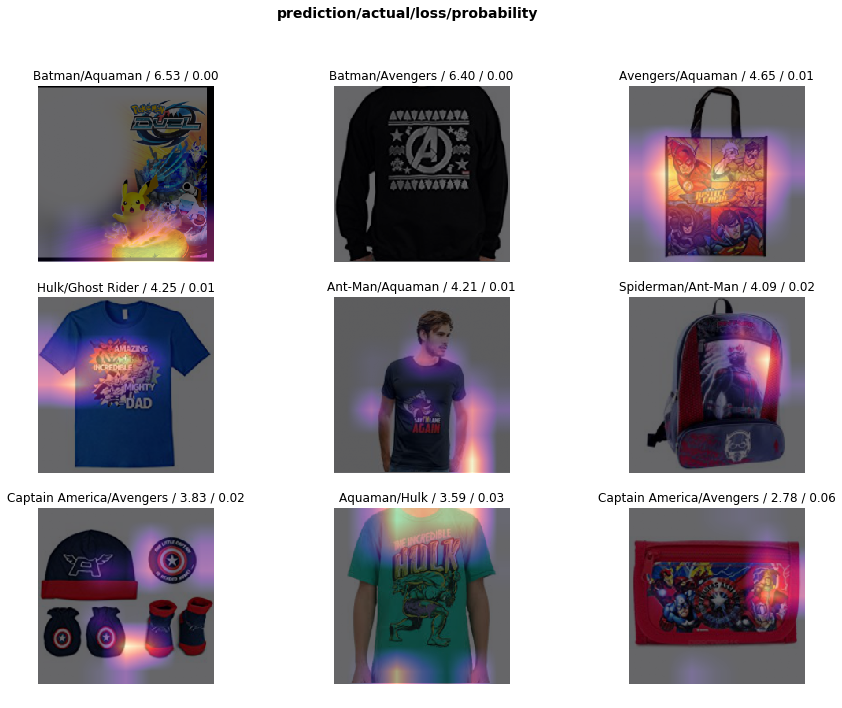

In [0]:
#Lists the top categories
interp.plot_top_losses(9, figsize=(15,11))

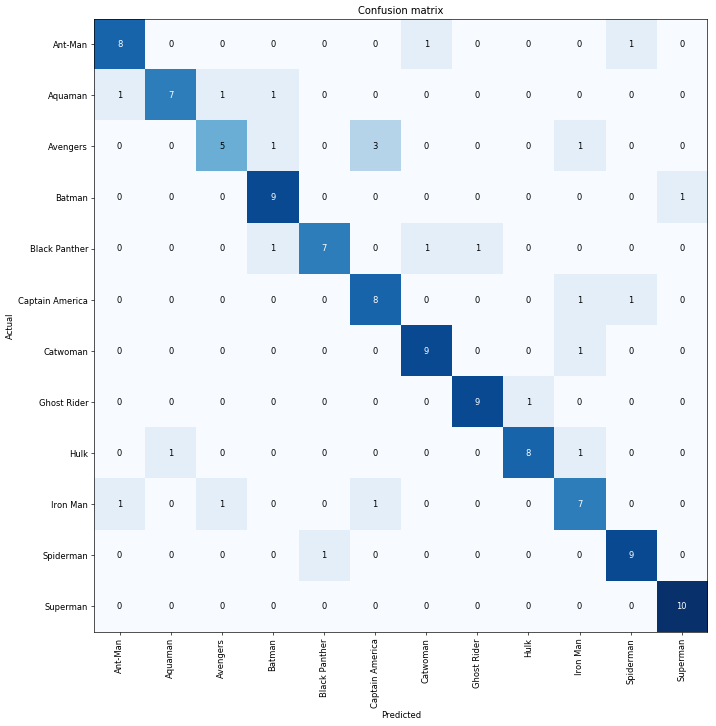

In [0]:
#shows where things went wrong in a confusion matrix
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [0]:
#most confused
interp.most_confused(min_val=2)

[('Avengers', 'Captain America', 3)]

In [0]:
#Resnet 50

In [0]:

# decrease the batch size even further
bs= 24

In [0]:
# II want all the transforms I can get. none of these things really matter with a scope.
# tfms= 

data= ImageDataBunch.from_folder(path, ds_tfms=get_transforms(do_flip=True, flip_vert=False, max_lighting=0.2, max_rotate=359, 
                                                              max_zoom=1.05, max_warp=0.2), size=500, bs=bs//4).normalize(imagenet_stats)

In [0]:
# Create a new learn with 
# data = information provided
# model = is the architecture we are using resnet50
# metrics = what we use to gauge success
learn = create_cnn(data, models.resnet50, metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:04<00:00, 25561852.36it/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


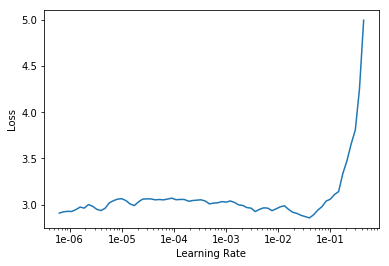

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,1.813171,1.234538,0.391667,16:49
1,1.563275,1.046195,0.300000,03:33
2,1.101406,0.906111,0.266667,03:36
3,1.178271,0.685422,0.216667,03:37
4,1.158747,0.677004,0.208333,03:34
5,0.834148,0.551632,0.175000,03:34
6,0.890472,0.528668,0.158333,03:37
7,0.789689,0.557437,0.166667,03:36


In [0]:
learn.save('/content/gdrive/My Drive/grocery_retail_dl/classification/Kvest-_ss_resnet')

In [0]:
learn.unfreeze()
learn.fit_one_cycle(8, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.769426,0.555171,0.175000,04:54
1,0.870560,0.555043,0.150000,04:53
2,0.724289,0.457499,0.141667,04:52
3,0.660570,0.468610,0.133333,04:53
4,0.653785,0.475587,0.133333,04:53
5,0.674980,0.441824,0.133333,04:53
6,0.589771,0.442034,0.141667,04:53
7,0.632645,0.440158,0.116667,04:53


In [0]:
learn.save('/content/gdrive/My Drive/grocery_retail_dl/classification/Kvest-_ss_resnet_1')

In [0]:
learn.load('/content/gdrive/My Drive/grocery_retail_dl/classification/Kvest-_ss_resnet_1')

Learner(data=ImageDataBunch;

Train: LabelList (5313 items)
x: ImageList
Image (3, 500, 500),Image (3, 500, 500),Image (3, 500, 500),Image (3, 500, 500),Image (3, 500, 500)
y: CategoryList
Superman,Superman,Superman,Superman,Superman
Path: /content/gdrive/My Drive/CAX_Superhero_Train;

Valid: LabelList (120 items)
x: ImageList
Image (3, 500, 500),Image (3, 500, 500),Image (3, 500, 500),Image (3, 500, 500),Image (3, 500, 500)
y: CategoryList
Iron Man,Iron Man,Iron Man,Iron Man,Iron Man
Path: /content/gdrive/My Drive/CAX_Superhero_Train;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
   

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [0]:

interp.most_confused(min_val=2)

[('Aquaman', 'Batman', 2), ('Avengers', 'Captain America', 2)]

In [0]:

interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

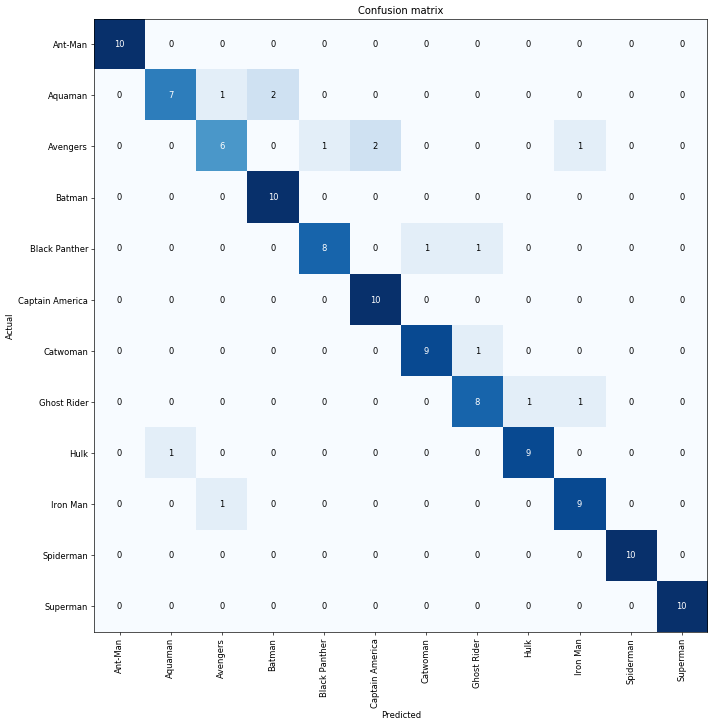

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


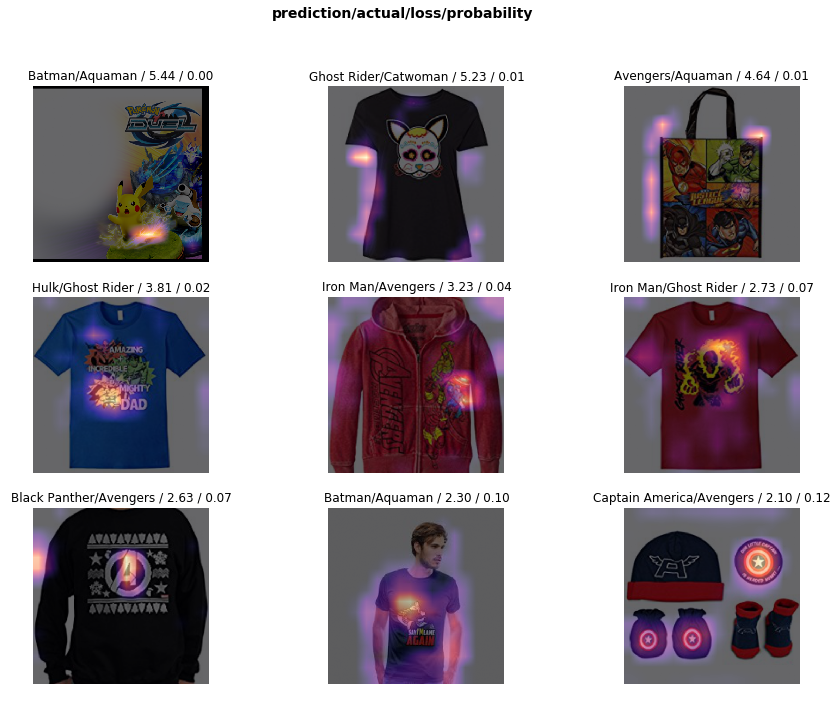

In [0]:
interp.plot_top_losses(9, figsize=(15,11))